In [8]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics
%matplotlib inline
digits = load_digits()

In [9]:
#printig the shape
print(digits.data.shape)
print(digits.target.shape)

(1797, 64)
(1797,)


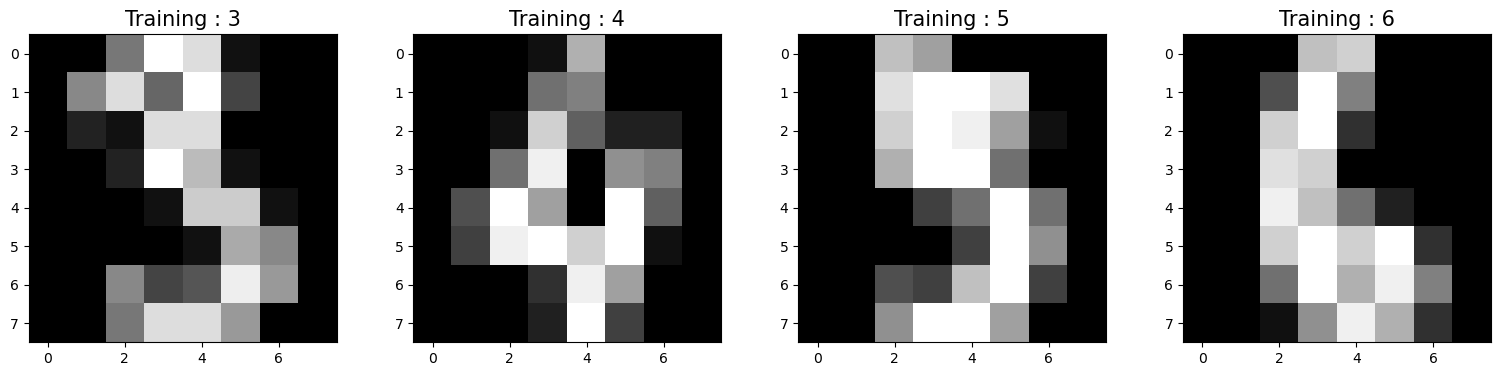

In [59]:
#printing the numbers from the data set
plt.figure(figsize=(24, 4))
for i, (img, label) in enumerate(zip(digits.data[3: 7], digits.target[3: 7])):
    plt.subplot(1, 5, i+1)
    plt.imshow(np.reshape(img, (8, 8)), cmap = plt.cm.gray)
    plt.title(f'Training : {label}', fontsize = 15)

In [67]:
#split the data into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.23, random_state = 2)

In [68]:
print(X_train.shape)

(1383, 64)


In [69]:
#creating the model
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()

In [70]:
#Training the model
log_model.fit(X_train, y_train)

C:\Users\SanthoshKumar\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [71]:
#predicting
preds = log_model.predict(X_test)

In [72]:
print("Score: ",log_model.score(X_test, y_test))

Score:  0.9516908212560387


In [74]:
print(log_model.predict(digits.data[3].reshape(1, -1)))
print(log_model.predict(X_test[0: 10]))

[3]
[4 0 9 1 8 7 1 5 1 6]


In [57]:
print("Accuracy Score : ", metrics.accuracy_score(y_test, preds))

Accuracy Score :  0.9516908212560387


In [75]:
#printing the confusion matrix
cm = metrics.confusion_matrix(y_test, preds)
print(cm)

[[37  0  0  0  1  0  0  0  0  0]
 [ 0 45  0  1  0  0  0  0  1  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  1  1  0]
 [ 0  0  0  0 34  0  0  0  3  1]
 [ 0  1  0  0  1 44  0  0  0  0]
 [ 0  1  0  0  0  0 39  0  1  0]
 [ 0  0  0  0  0  0  0 45  1  0]
 [ 0  0  0  0  0  0  0  0 37  1]
 [ 0  0  0  2  0  1  0  0  1 30]]


Text(70.72222222222221, 0.5, 'Predicted Values')

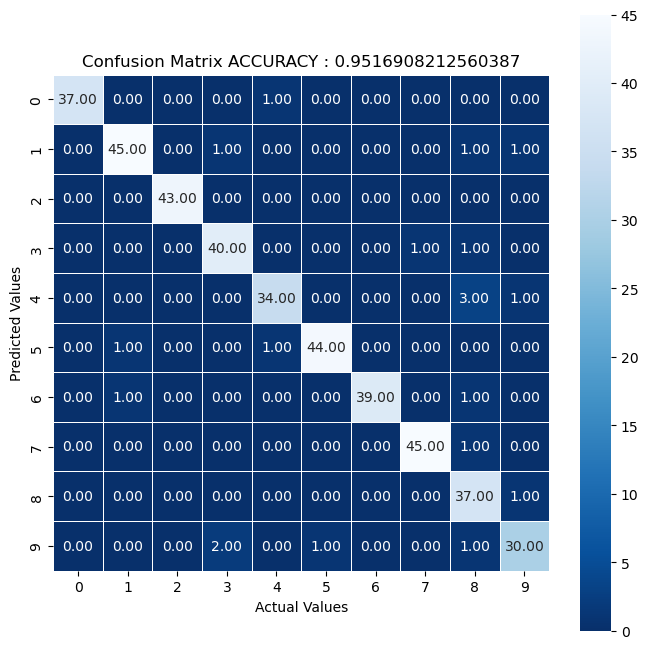

In [96]:
#Visualizing the confusion matrix using heatmap
s = log_model.score(X_test, y_test)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot = True, fmt ='0.2f',linewidths = 0.5, square = True, cmap = 'Blues_r');
plt.title(f"Confusion Matrix ACCURACY : {s}")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")